In [309]:
# Day24 Assignment Batch1 AIML 
# Venkkatesh V R 
# Building Decision Tree Model and Random Forest Algorithm

In [310]:
# import the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import io  
from IPython.display import Image  
import pydotplus
import graphviz 
import warnings

warnings.filterwarnings('ignore')


In [311]:
# End Of Assignment 

# Decision Tree

Project 1: Build Decision Tree(DV-"Survived",IDV-"Age,Gender and Fare") and Prediction

Project 2: Build Decision Tree for Attrition Rate Analysis
DV - "Attrition"
IDV - Output of RF Algorithm

Project 3: Build Decision Tree for Bank Loan Modelling
DV - "Personal Loan"
IDV - Output of RF Algorithm

## Project 1: Predict Survival on Titanic dataset based on Build Decision Tree Model

**Decision Tree -(DV-"Survived",IDV-"Age,Gender and Fare") and Prediction**

In [312]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [313]:
data1 = pd.read_csv('test.csv')
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [314]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [315]:
feature_cols = ['Pclass','Sex', 'Age', 'SibSp','Parch','Embarked' ]
X_train = data[['Pclass','Sex', 'Age', 'SibSp','Parch','Embarked' ]]
y_train = data[['Survived']]
X_test = data1[['Pclass','Sex', 'Age', 'SibSp','Parch','Embarked' ]]


In [316]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [317]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [318]:
# Perform data pre-processing to convert categorical variables to numeric variables using label encoder

le = LabelEncoder()
X_train.Sex= le.fit_transform(X_train.Sex)
X_train.Embarked= le.fit_transform(X_train.Embarked)

X_test.Sex= le.fit_transform(X_test.Sex)
X_test.Embarked= le.fit_transform(X_test.Embarked)


In [319]:
#feature scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [320]:
#Fit the model in the Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [321]:
#prediction
y_pred = classifier.predict(X_test)#Accuracy
#from sklearn import metrics
#print('Accuracy Score:', metrics.accuracy_score(y_train,y_pred))

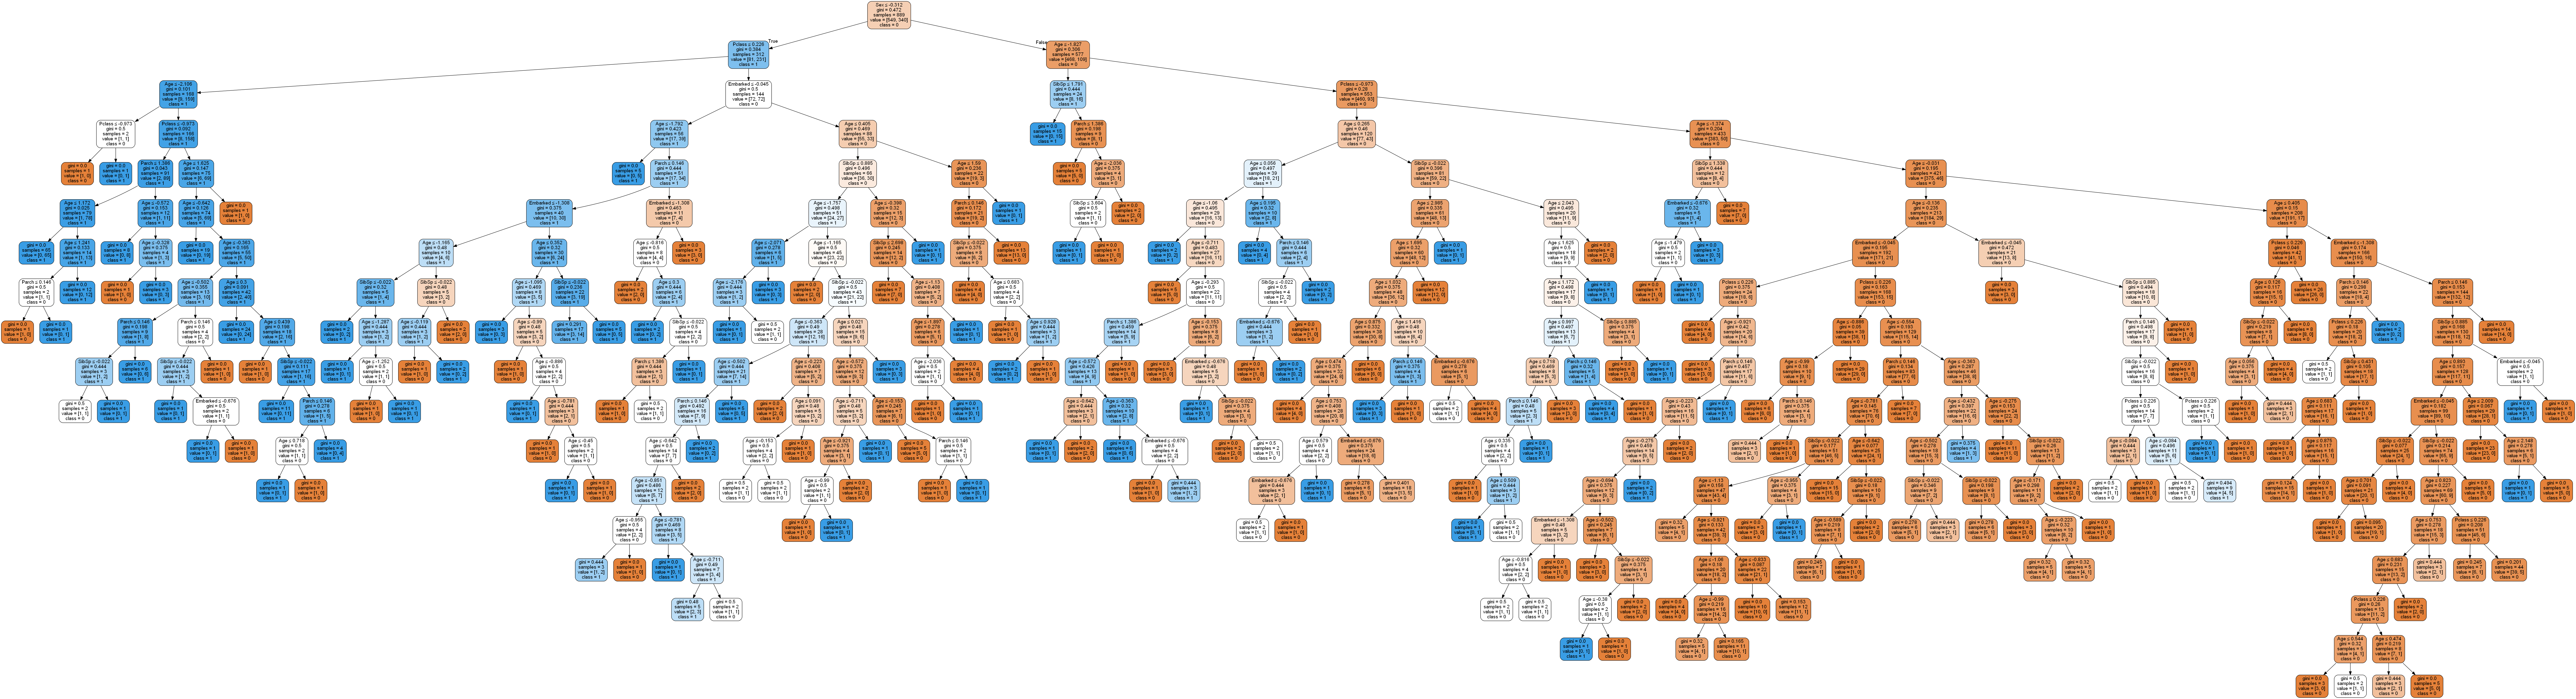

In [322]:
dot_data = io.StringIO()
tree.export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [323]:
# Create a pdf file for the decision tree

dot_data = tree.export_graphviz(classifier, out_file=None,
                     feature_names = feature_cols,class_names=['0','1'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("titanic") 

'titanic.pdf'

In [324]:
# Create Decision Tree classifer object using entropy
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)#Predict the response for test dataset
y_pred = classifier.predict(X_test)# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

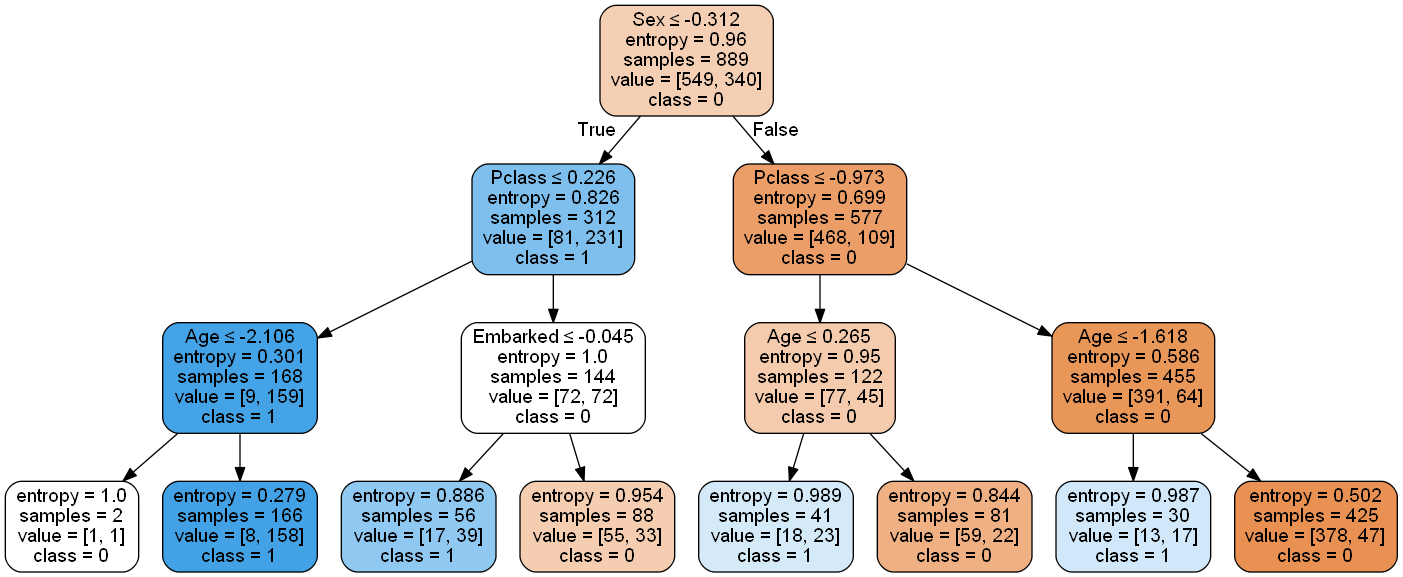

In [325]:
dot_data = io.StringIO()
tree.export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [326]:
# Create Decision Tree classifer object  using Gini Index
classifier = DecisionTreeClassifier(criterion="gini", max_depth=3)# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)#Predict the response for test dataset
y_pred = classifier.predict(X_test)# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

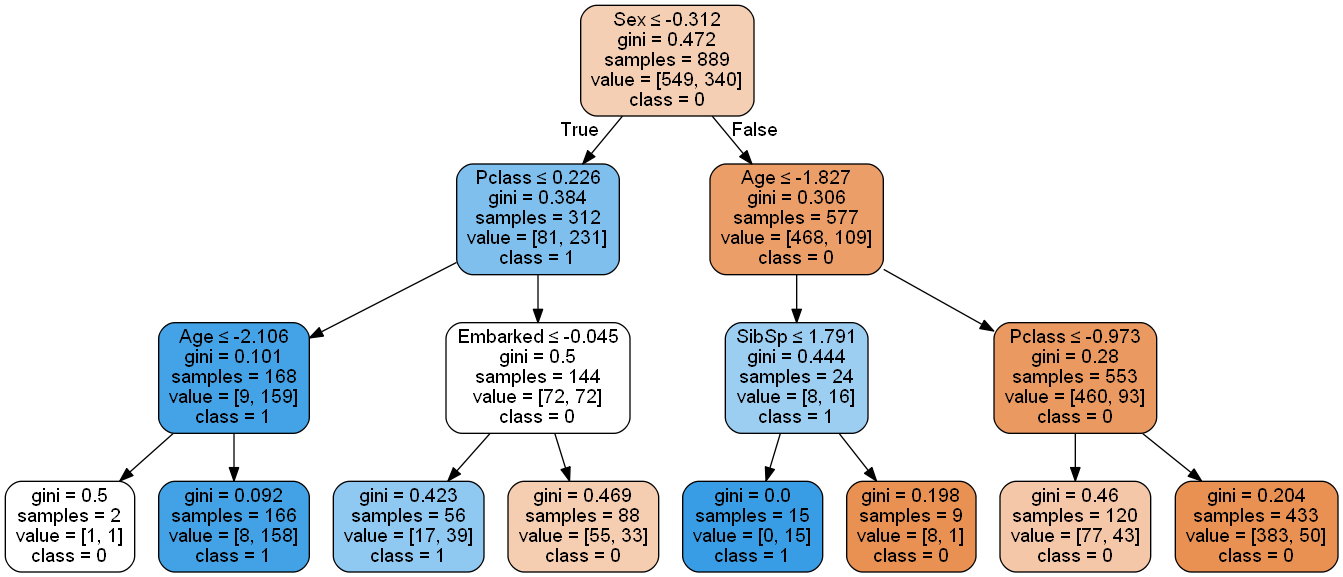

In [327]:
dot_data = io.StringIO()
tree.export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [328]:
from sklearn.tree import export_text
r = export_text(classifier, feature_names=feature_cols)
print(r)

|--- Sex <= -0.31
|   |--- Pclass <= 0.23
|   |   |--- Age <= -2.11
|   |   |   |--- class: 0
|   |   |--- Age >  -2.11
|   |   |   |--- class: 1
|   |--- Pclass >  0.23
|   |   |--- Embarked <= -0.04
|   |   |   |--- class: 1
|   |   |--- Embarked >  -0.04
|   |   |   |--- class: 0
|--- Sex >  -0.31
|   |--- Age <= -1.83
|   |   |--- SibSp <= 1.79
|   |   |   |--- class: 1
|   |   |--- SibSp >  1.79
|   |   |   |--- class: 0
|   |--- Age >  -1.83
|   |   |--- Pclass <= -0.97
|   |   |   |--- class: 0
|   |   |--- Pclass >  -0.97
|   |   |   |--- class: 0



### Random Forest 

In [329]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000,max_features=4,max_depth=4, random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
 

In [330]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [331]:
# End Of Assignment 